1. Use the tcs_stock.csv and perform suitable preprocessing. Figure out the trend, seasonality and cyclical information (if any). Apply ARIMA and forecast the turnover and deliverable volume for the next 2 months.


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
ts_data = pd.read_csv("TCS.csv")

In [81]:
ts_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.062008,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.668533,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.692036,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.692036,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
...,...,...,...,...,...,...,...
5024,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
5025,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
5026,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
5027,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


In [82]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5029 non-null   object 
 1   Open       5020 non-null   float64
 2   High       5020 non-null   float64
 3   Low        5020 non-null   float64
 4   Close      5020 non-null   float64
 5   Adj Close  5020 non-null   float64
 6   Volume     5020 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.1+ KB


In [83]:
ts_data['Date'] = pd.to_datetime(ts_data['Date'])

Stock market is closed on Weekends and Pubic holidays.
Hence, data for those days is not included.

In [84]:
from datetime import timedelta
import numpy as np

i = -1
last_date = ts_data.iloc[-1][0]

while True:
    i += 1
    date = ts_data.iloc[i][0]
    next_date = date + timedelta(days=1)

    # Stop condition
    if date == last_date:
        break
    
    if not np.isfinite(ts_data.iloc[i, -1]):
        ts_data.drop(index=i, inplace=True)
        i -= 1
        continue
    
    # If next date is not in DataFrame, 
    # Since Weekends & Holidays -> Stock Market is Closed
    if next_date != ts_data.iloc[i+1][0]:
        # Duplicate Last working day data to next days
        ts_data1 = ts_data.iloc[:i+1, ]
        ts_data2 = ts_data.iloc[i+1:, ]
        
        ts_data1 = pd.concat([ts_data1, ts_data.iloc[i:i+1,]], ignore_index=True)
        ts_data1.iloc[i+1, 0] = next_date
        ts_data = pd.concat([ts_data1, ts_data2], ignore_index=True)
        
ts_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.062008,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.668533,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.692036,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.692036,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
5,2002-08-17,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
6,2002-08-18,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0
7,2002-08-19,36.674999,36.674999,35.137501,35.474998,25.969135,205880.0
8,2002-08-20,35.724998,38.724998,35.487499,36.462502,26.692036,3773624.0
9,2002-08-21,38.474998,39.200001,36.525002,38.250000,28.000542,3011064.0


(OR)

In [85]:
'''
# NOTE: Code snippet is buggy. Fix before use.

import numpy as np

# Make "Date" as index
ts_data.set_index("Date")
ts_data.drop('Date', axis=1, inplace=True)

# Make all dates available and fill missing dates with NULL
new_date_range = pd.date_range(start="2002-08-12", end="2022-10-25", freq="D")
ts_data = ts_data.reindex(new_date_range, fill_value=np.nan)

# Replace null values with previous data - back filling
ts_data.fillna(method="bfill", inplace=True)

print(ts_data)

'''

'\n# NOTE: Code snippet is buggy. Fix before use.\n\nimport numpy as np\n\n# Make "Date" as index\nts_data.set_index("Date")\nts_data.drop(\'Date\', axis=1, inplace=True)\n\n# Make all dates available and fill missing dates with NULL\nnew_date_range = pd.date_range(start="2002-08-12", end="2022-10-25", freq="D")\nts_data = ts_data.reindex(new_date_range, fill_value=np.nan)\n\n# Replace null values with previous data - back filling\nts_data.fillna(method="bfill", inplace=True)\n\nprint(ts_data)\n\n'

Filled last working day data on Holidays.

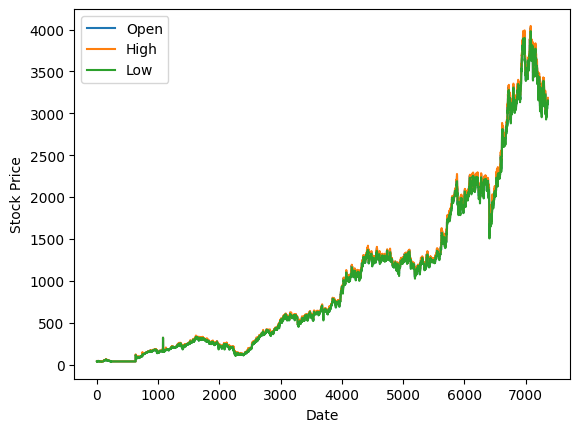

In [86]:
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.plot(ts_data['Close'])
plt.plot(ts_data['High'])
plt.plot(ts_data['Low'])
plt.legend(["Open", "High", "Low"])

TCS's IPO (Initial Public Offering) Issue Open Date: 29-07-2004 (i.e.) TCS's stocks were released to the public on 29th July 2004. Since there was not much variation in Stocks before this date, we analyze data starting from 29th July 2004.

In [87]:
# Remove data before 29th July 2004
for i in range(len(ts_data)):
    if (ts_data.iloc[i][0] == pd.to_datetime("2004-07-29")):
        ts_data = ts_data.iloc[i:, :]
        break

<b>NOTE:</b> ARIMA Model was taking TOO long - 10+ hours and still didn't complete model fitting, with 20-year dataset to predict next 2 years.

Instead, using 3 years data to predict next 2 months.

In [88]:
ts_data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
7360,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
7361,2022-10-22,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
7362,2022-10-23,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
7363,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0
7364,2022-10-25,3180.500000,3184.250000,3151.149902,3162.100098,3162.100098,2069643.0


In [89]:
# Save for later - to test Accuracy
ts_data_all = ts_data

# Remove data before 25th October 2017
for i in range(len(ts_data)):
    if (ts_data.iloc[i][0] == pd.to_datetime("2017-10-25")):
        ts_data = ts_data.iloc[i:, :]
        break

# Remove data after 25th October 2021
for i in range(len(ts_data)):
    if (ts_data.iloc[i][0] == pd.to_datetime("2021-10-25")):
        ts_data = ts_data.iloc[:i+1, :]
        break

In [90]:
ts_data = ts_data.set_index("Date")

In [91]:
ts_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-25,1289.250000,1307.000000,1277.500000,1279.949951,1169.093506,1105106.0
2017-10-26,1267.550049,1284.574951,1258.949951,1269.425049,1159.480347,3007552.0
2017-10-27,1269.000000,1296.574951,1265.150024,1292.150024,1180.236938,1409270.0
2017-10-28,1269.000000,1296.574951,1265.150024,1292.150024,1180.236938,1409270.0
2017-10-29,1269.000000,1296.574951,1265.150024,1292.150024,1180.236938,1409270.0
...,...,...,...,...,...,...
2021-10-21,3604.100098,3607.449951,3511.250000,3532.500000,3484.469727,4871211.0
2021-10-22,3560.000000,3561.600098,3485.000000,3498.850098,3451.277344,2691670.0
2021-10-23,3560.000000,3561.600098,3485.000000,3498.850098,3451.277344,2691670.0


# Stationarity Check - Rolling Statistics

In [92]:
delVolume = ts_data['Volume'].to_frame()
delVolume_rolling_mean = delVolume.rolling(window=30).mean()
delVolume_rolling_standardDeviation = delVolume.rolling(window=30).std()

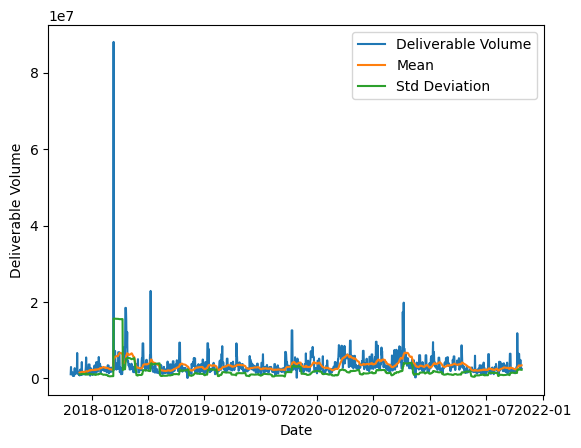

In [93]:
plt.xlabel("Date")
plt.ylabel("Deliverable Volume")

plt.plot(delVolume)
plt.plot(delVolume_rolling_mean)
plt.plot(delVolume_rolling_standardDeviation)

plt.legend(["Deliverable Volume", "Mean", "Std Deviation"])

It is NOT Stationary Data - since mean and std deviation change with time.

# Stationarity Check - ADF Test

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
delVolume_adftest = adfuller(delVolume['Volume'])
print(delVolume_adftest)

(-14.015914724067843, 3.643250394067999e-26, 3, 1458, {'1%': -3.434843038681996, '5%': -2.8635243777871286, '10%': -2.56782646544019}, 46815.20197642664)


In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose

# To choose period, start off with a BIG period, and check 'Season' graph.
# According to graph, 1 period = 1 cycle of pattern
delVolume_decompose = seasonal_decompose(delVolume, period=90)
delVolume_trend = delVolume_decompose.trend
delVolume_seasonal = delVolume_decompose.seasonal

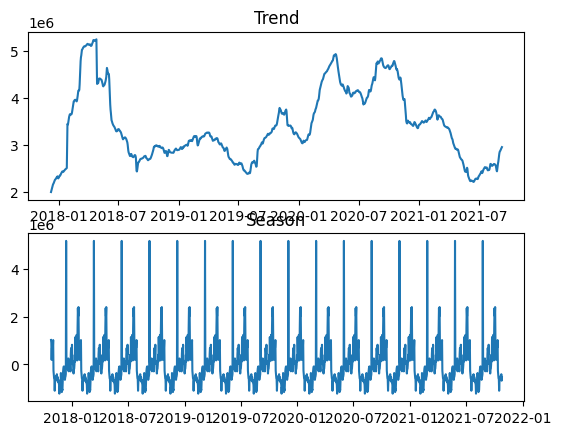

In [97]:
# DELIVERABLE VOLUME PLOT

plt.subplot(211)
plt.title('Trend')
plt.plot(delVolume_trend)

plt.subplot(212)
plt.title("Season")
plt.plot(delVolume_seasonal)

# Converting Non-Stationary data to Stationary Data

In [98]:
delVolume_new = delVolume['Volume'] - delVolume['Volume'].shift(1)

In [99]:
print(adfuller(delVolume_new.dropna())) # Since rows are subtracted, first row will be NaN.

(-15.022901008825292, 1.0162012537628805e-27, 17, 1443, {'1%': -3.434889827343955, '5%': -2.863545026607168, '10%': -2.5678374612882515}, 46841.3390824303)


# Plotting ACF & PACF

In [100]:
from statsmodels.tsa.stattools import acf, pacf

In [101]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 8

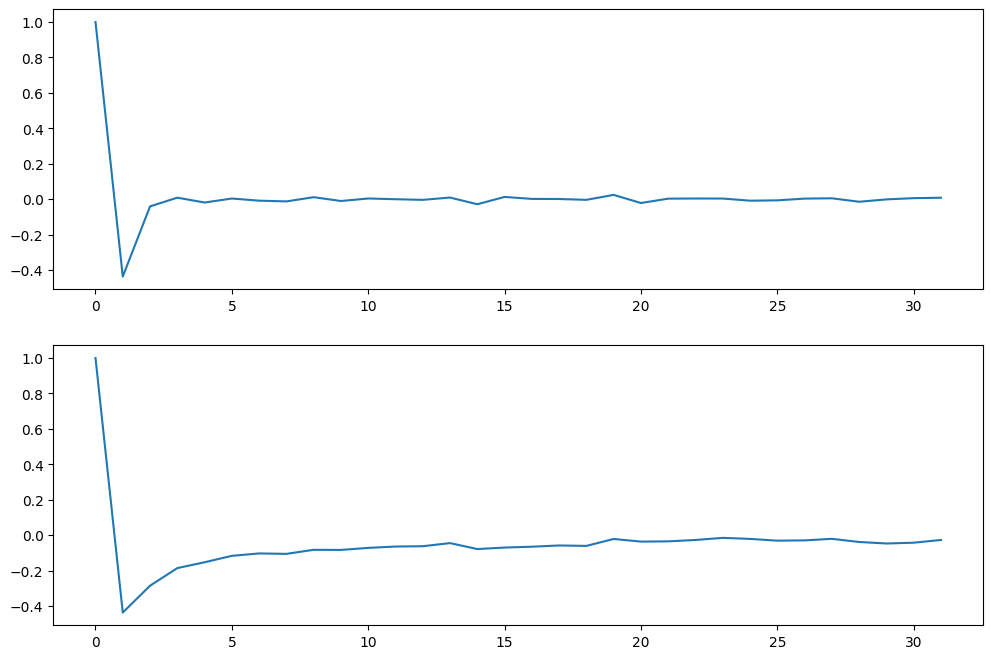

In [102]:
delVolume_d_acf = acf(delVolume_new.dropna())
delVolume_d_pacf = pacf(delVolume_new.dropna())

plt.subplot(211)
plt.plot(delVolume_d_acf)
plt.subplot(212)
plt.plot(delVolume_d_pacf)

In [103]:
from statsmodels.tsa.arima.model import ARIMA

delVolume_model = ARIMA(delVolume, order = (1, 1, 1))
# order = (p, d, q), where 'p' & 'q' = Value of Line @ 'x = 0' in 'acf' and 'pacf' tests respectively
# 'd' = shift value
delVolume_model_fit = delVolume_model.fit()

/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [104]:
delVolume_res = delVolume_model_fit.forecast(3 * 30) # 3 Months x 30 Days per Month

In [105]:
delVolume_res = pd.DataFrame(delVolume_res)
delVolume_res.columns=["Volume"]
delVolume_final = pd.DataFrame(delVolume)
delVolume_pred = pd.concat([delVolume_final, delVolume_res], ignore_index=True)

delVolume_res = delVolume_res.reset_index(drop=True)
delVolume_res.index = delVolume_res.index + len(delVolume_final)

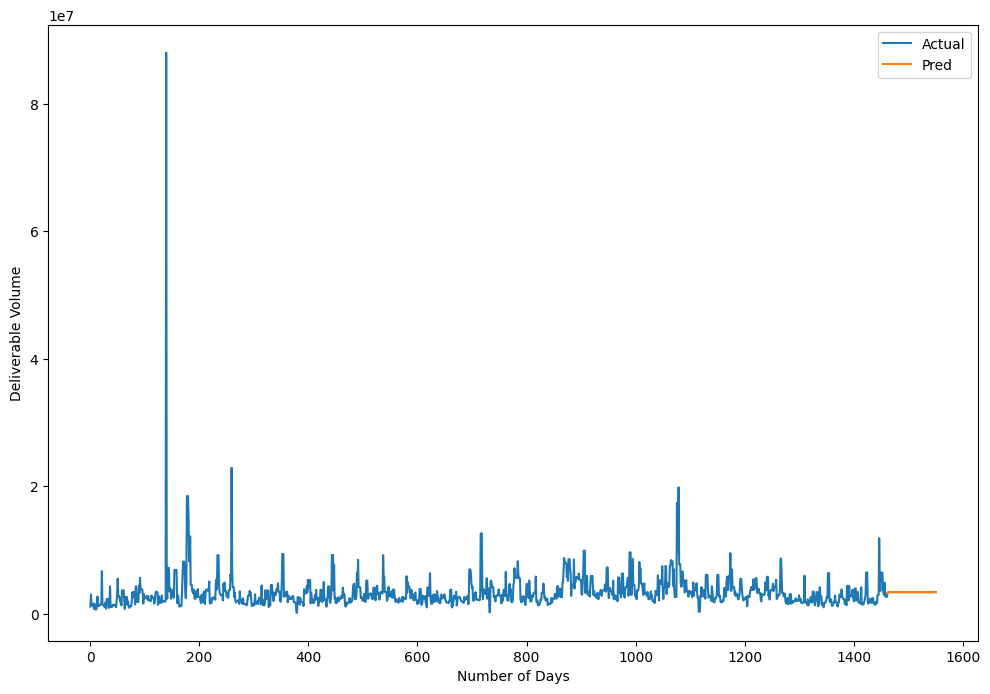

In [106]:
# DELIVERABLE VOLUME PLOT
plt.plot(delVolume_pred)
plt.plot(delVolume_res)
plt.xlabel("Number of Days")
plt.ylabel("Deliverable Volume")
plt.legend(["Actual", "Pred"])

Note: Graph is a straight line since Seasonal information is NOT given.

In [107]:
from statsmodels.tsa.arima.model import ARIMA

delVolume_model = ARIMA(delVolume, order = (1, 1, 1), seasonal_order = (1, 1, 1, 90))
delVolume_model_fit = delVolume_model.fit()

/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sheriffabdullah/opt/anaconda3/envs/programmingWithPython/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [108]:
delVolume_res = delVolume_model_fit.forecast(3 * 30)

In [109]:
delVolume_res = pd.DataFrame(delVolume_res)
delVolume_res.columns=["Volume_Pred"]
delVolume_final = pd.DataFrame(delVolume)
delVolume_pred = pd.concat([delVolume_final, delVolume_res], ignore_index=True)

delVolume_res = delVolume_res.reset_index(drop=True)
delVolume_res.index = delVolume_res.index + len(delVolume_final)

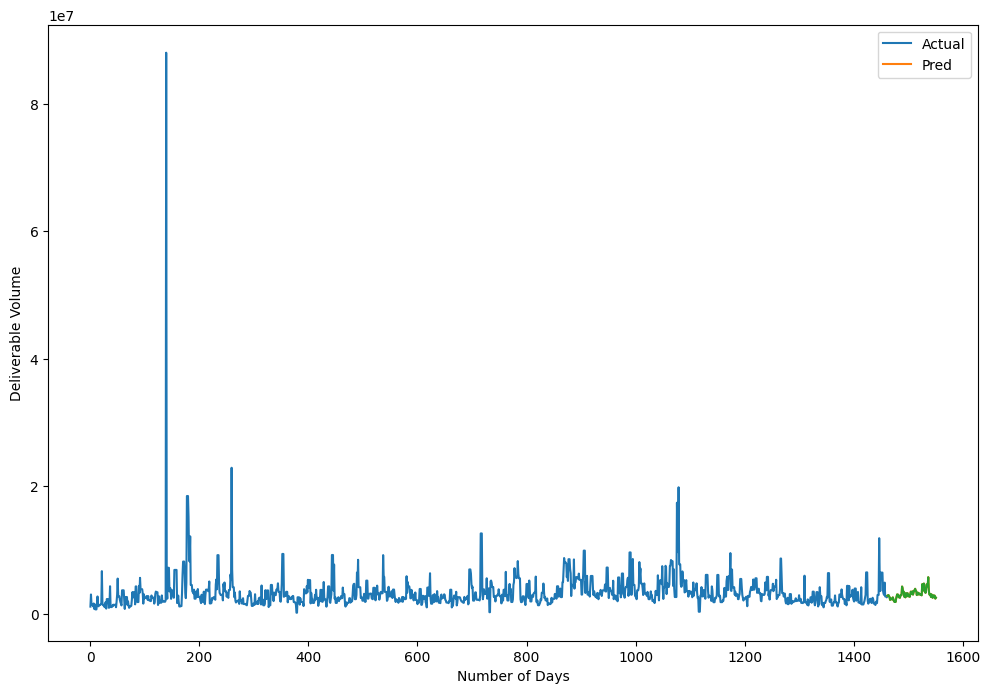

In [110]:
# DELIVERABLE VOLUME PREDICTED PLOT
plt.plot(delVolume_pred)
plt.plot(delVolume_res)
plt.xlabel("Number of Days")
plt.ylabel("Deliverable Volume")
plt.legend(["Actual", "Pred"])

In [111]:
# Remove data before 25th October 2021
for i in range(len(ts_data_all)):
    if (ts_data_all.iloc[i][0] == pd.to_datetime("2021-10-25")):
        ts_data_all = ts_data_all.iloc[i:, :]
        break

# Remove data after 25th December 2021 - Not Required
for i in range(len(ts_data_all)):
    if (ts_data_all.iloc[i][0] == pd.to_datetime("2021-12-25")):
        ts_data_all = ts_data_all.iloc[:i+1, :]
        break

ts_data_all.reset_index(drop=True, inplace=True)
delVolume_res.reset_index(drop=True, inplace=True)

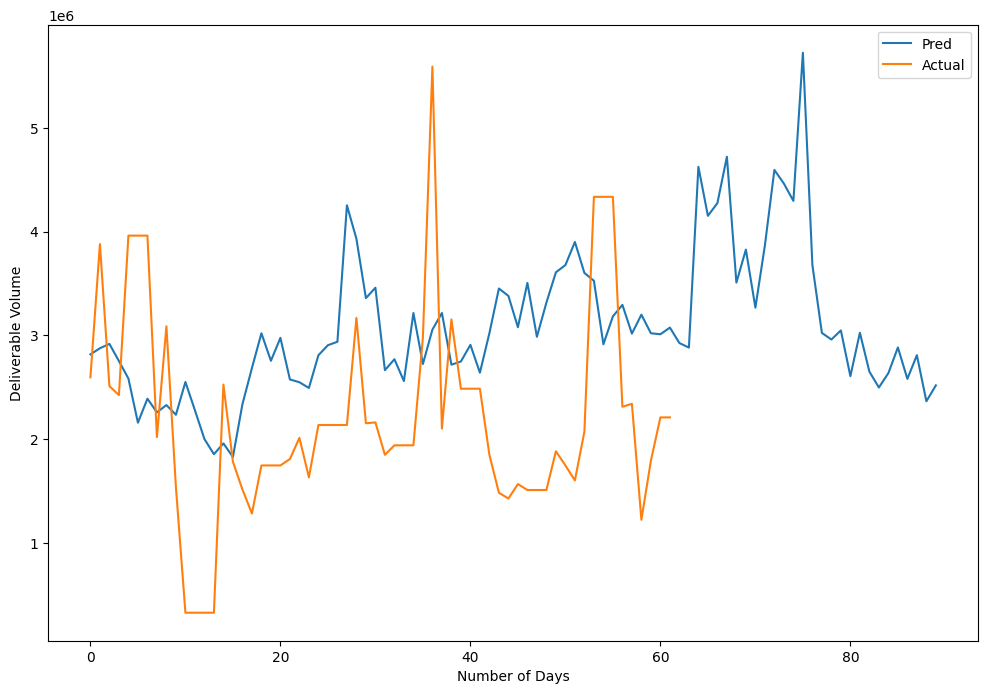

In [124]:
# PREDICTED v/s ACTUAL PLOT
plt.plot(delVolume_res)
plt.plot(ts_data_all.loc[:, 'Volume'])
plt.xlabel("Number of Days")
plt.ylabel("Deliverable Volume")
plt.legend(["Pred", "Actual"])

In [113]:
df = pd.concat([delVolume_res, ts_data_all], axis=1)
df.dropna(inplace=True)
df.corr(method="pearson", numeric_only=True)

,Volume_Pred,Open,High,Low,Close,Adj Close,Volume
Volume_Pred,1.000000,0.348704,0.399077,0.279585,0.333805,0.333805,0.112605
Open,0.348704,1.000000,0.955418,0.944705,0.908134,0.908134,-0.128913
High,0.399077,0.955418,1.000000,0.943091,0.948947,0.948947,0.018734
Low,0.279585,0.944705,0.943091,1.000000,0.963438,0.963439,-0.132649
Close,0.333805,0.908134,0.948947,0.963438,1.000000,1.000000,-0.141761
Adj Close,0.333805,0.908134,0.948947,0.963439,1.000000,1.000000,-0.141761
Volume,0.112605,-0.128913,0.018734,-0.132649,-0.141761,-0.141761,1.000000


# Use regular expression and perform the following:

In [114]:
import re

1. Write a Python program to find sequences of lowercase letters joined with a underscore

In [115]:
def custom_find(string):
    pattern = "^[a-z]+_[a-z]+$"
    
    if re.search(pattern, string):
        return "Found."
    else:
        return "Not found."

s1 = "s_e_q_u_e_n_c_e" # Many underscores
s2 = "hello world" # No underscore
s3 = "hello_there"
s4 = "a_a"

print(custom_find(s1))
print(custom_find(s2))
print(custom_find(s3))
print(custom_find(s4))

Not found.
Not found.
Found.
Found.


2. Write a program to validate an email ID

In [116]:
def validate_email(string):
    pattern = "^[a-zA-z0-9_.\-\+]+@([a-zA-Z0-9\-]+.)+[a-z]+[a-z]$"
    
    if re.search(pattern, string):
        return "Valid email ID."
    else:
        return "Invalid email ID."

e1 = "abdullaha@agg" # No '.xyz'
e2 = "123gmail.com" # No '@'
e3 = "@gmail.com" # No characters before '@'
e4 = "abdullah21110220@snuchennai.edu.in"

print(validate_email(e1))
print(validate_email(e2))
print(validate_email(e3))
print(validate_email(e4))

Invalid email ID.
Invalid email ID.
Invalid email ID.
Valid email ID.


3. Write a Python program that matches a string that has an 'a' followed by anything, ending in 'b'

In [117]:
def custom_match(string):
    pattern = "^a[a-zA-Z0-9\+\-\*!@#\$%\^&\(\)=_]+b$"
    
    if re.search(pattern, string):
        return "Match found."
    else:
        return "Match not found."

s1 = "Ab" # Capital 'a'
s2 = "a" # No 'b'
s3 = "aaaab"
s4 = "a-c-b"

print(custom_match(s1))
print(custom_match(s2))
print(custom_match(s3))
print(custom_match(s4))

Match not found.
Match not found.
Match found.
Match found.


4. Write a Python program to replace whitespaces with an underscore and vice versa.

In [118]:
def replace_both(string, c1, c2):
    s1 = re.split(c1, string)
    s1 = [re.sub(c2, c1, x) for x in s1]
    s = c2.join(s1)
    return s

s = "p_y_t_h_o_n is awesome"

print(replace_both(s, ' ', '_'))

p y t h o n_is_awesome


5. Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

In [119]:
def reverse_date(date):
    date = re.split('-', date)
    date.reverse()
    out = '-'.join(date)
    return out

s = "2016-07-04"

print(reverse_date(s))

04-07-2016
